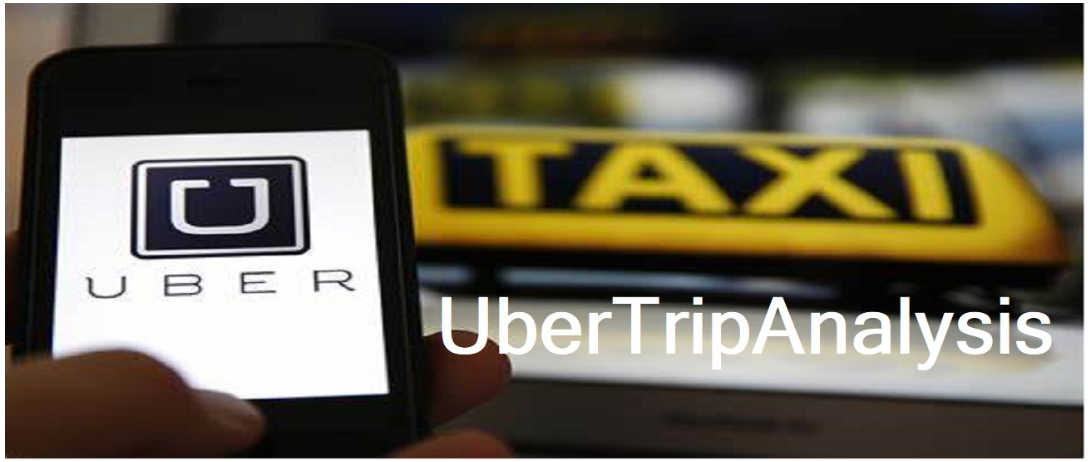

### Import basic required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt

### Load and Read the dataset

In [2]:
df=pd.read_csv('dataset/uber_rides_data.csv')
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Understanding the data

### Shape of the given dataset

In [3]:
print("Shape of the given dataset", df.shape)

Shape of the given dataset (200000, 8)


### Size of the dataset

In [4]:
print("Size of the dataset", df.size)

Size of the dataset 1600000


### Columns in the dataset

In [5]:
df.columns

Index(['ride_id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

### Data types for each column

In [6]:
df.dtypes

ride_id                int64
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Column information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


### Basic Statistical Measures

In [8]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ride_id,200000.0,27712503.68,16013822.21,1.00,13825346.25,27745495.00,41555300.75,55423567.00
fare_amount,200000.0,11.36,9.90,-52.00,6.00,8.50,12.50,499.00
pickup_longitude,200000.0,-72.53,11.44,-1340.65,-73.99,-73.98,-73.97,57.42
pickup_latitude,200000.0,39.94,7.72,-74.02,40.73,40.75,40.77,1644.42
dropoff_longitude,199999.0,-72.53,13.12,-3356.67,-73.99,-73.98,-73.96,1153.57
dropoff_latitude,199999.0,39.92,6.79,-881.99,40.73,40.75,40.77,872.70
passenger_count,200000.0,1.68,1.39,0.00,1.00,1.00,2.00,208.00


In [9]:
df['ride_id'].astype('object').describe().T

count       200000
unique      200000
top       24238194
freq             1
Name: ride_id, dtype: int64

### Insights:
<code style="color:red">1. The average fare amount is 11.36 USD, Minimum fare amount is -52 USD and this is something strange. and Maximum fare amount is 499 USD.<br>
2. Most pickup point or location are at near longitude -72.53 and latitude 39.94 and most dropoff locations are near longitude -72.53 and latitude 39.92.<br>
3. Average number of passangers per ride is 1.68 which is nearly equal to 2. Minimum number of passangers on 0 and maximum number of passangers are 208, this is strange because Uber Taxi not have this much seat capacity.<br>
4. There are total 2000000 unique ride or trip id's.</code>

In [10]:
df.describe(include='object').T

,count,unique,top,freq
pickup_datetime,200000,196629,2014-04-13 18:19:00 UTC,4


<code style="color:red">We know that pickup_datetime column should be of datetime type and not the object type.</code>

### Missing values

In [11]:
df.isna().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

<code style="color:red"> "dropoff_latitude and longitude columns contains 1 missing values each.</code>

### Out of 200000 rows only 1 row contains missing values hence we afford to drop this.

In [12]:
df.dropna(inplace=True)
df.isna().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<code style="color:red">Now our dataset contains no missing values.</code>

### Change datatype of pickup_datetime column from object to datetime

In [13]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df.dtypes

ride_id                            int64
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

<code style="color:red"> Now the "pickup_datetime" column is in datetime format.</code>

### Extracting new columns Year, Month, Day, Weekday & Hour

In [18]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['weekday']=df['pickup_datetime'].dt.weekday
df['hour']=df['pickup_datetime'].dt.hour
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17


## Exploratory Data Analysis

### 1. Analyze Fare Amount column

In [19]:
df['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

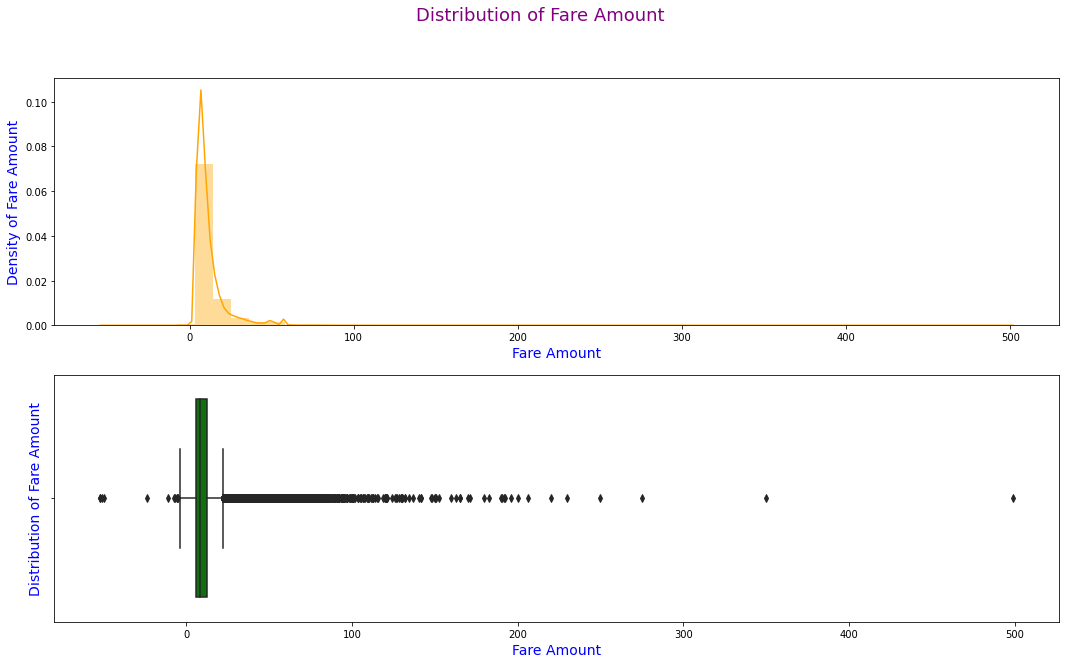

In [20]:
plt.figure(figsize=(18,10))
plt.subplot(211)
sns.distplot(df.fare_amount, color='orange')
plt.xlabel("Fare Amount", fontsize=14, color='blue')
plt.ylabel("Density of Fare Amount", fontsize=14, color='blue');

plt.subplot(212)
sns.boxplot(data=df, x='fare_amount', color='green')
plt.xlabel("Fare Amount", fontsize=14, color='blue')
plt.ylabel("Distribution of Fare Amount", fontsize=14, color='blue');
plt.suptitle("Distribution of Fare Amount", fontsize=18, color='purple');

### Insight:
1. **Average fare amount is 11.359892 USD, Minimum fare amount is -52 USD and maximum fare amount is 499 USD.**
2. **Minimum fare amount cannot be negative, we need use feature engineer to deal with this issue.**
3. **From Distribution plot and Boxplot we can clearly say that the fare amount column is right skewed that is tail is extended towards right side.**
4. **Skewed data means outliers, we need to take care of outliers for better machine learning performance.**

### 2. Analyzing pickup and dropoff points

#### To calculate Haversine distance between two point sklearn provides inbuild functionality,
**from sklearn.metrics.pairwise import haversine_distances(X,y)**

Formula for distance:
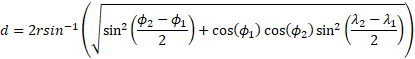

* Let the central angle θ between any two points on a sphere be:

**θ=d/r**

where:
- d: is the distance between the two points along a great circle of the sphere (see spherical distance),
- r: is the radius of the sphere.

In [21]:
import math
from math import radians, cos, sin, asin, sqrt

In [22]:
def haversine_dist(row):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1 = radians(row['pickup_latitude']), radians(row['pickup_longitude'])
    lat2, lon2 = radians(row['dropoff_latitude']), math.radians(row['dropoff_longitude'])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * \
        cos(lat2) * sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), sqrt(1-a))
    distance = R * c
    return distance


df['distance'] = df.apply(haversine_dist, axis=1)
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,4.475450


### 2.1 Analyzing Distance between pickup and drop location or point

In [22]:
round(df['distance'].describe(),2).T

count    199999.00
mean         20.86
std         382.96
min           0.00
25%           1.22
50%           2.12
75%           3.88
max       16409.24
Name: distance, dtype: float64

In [23]:
print("Median Distance between pickup and drop point is = ", round(df['distance'].median(), 2))

Median Distance between pickup and drop point is =  2.12


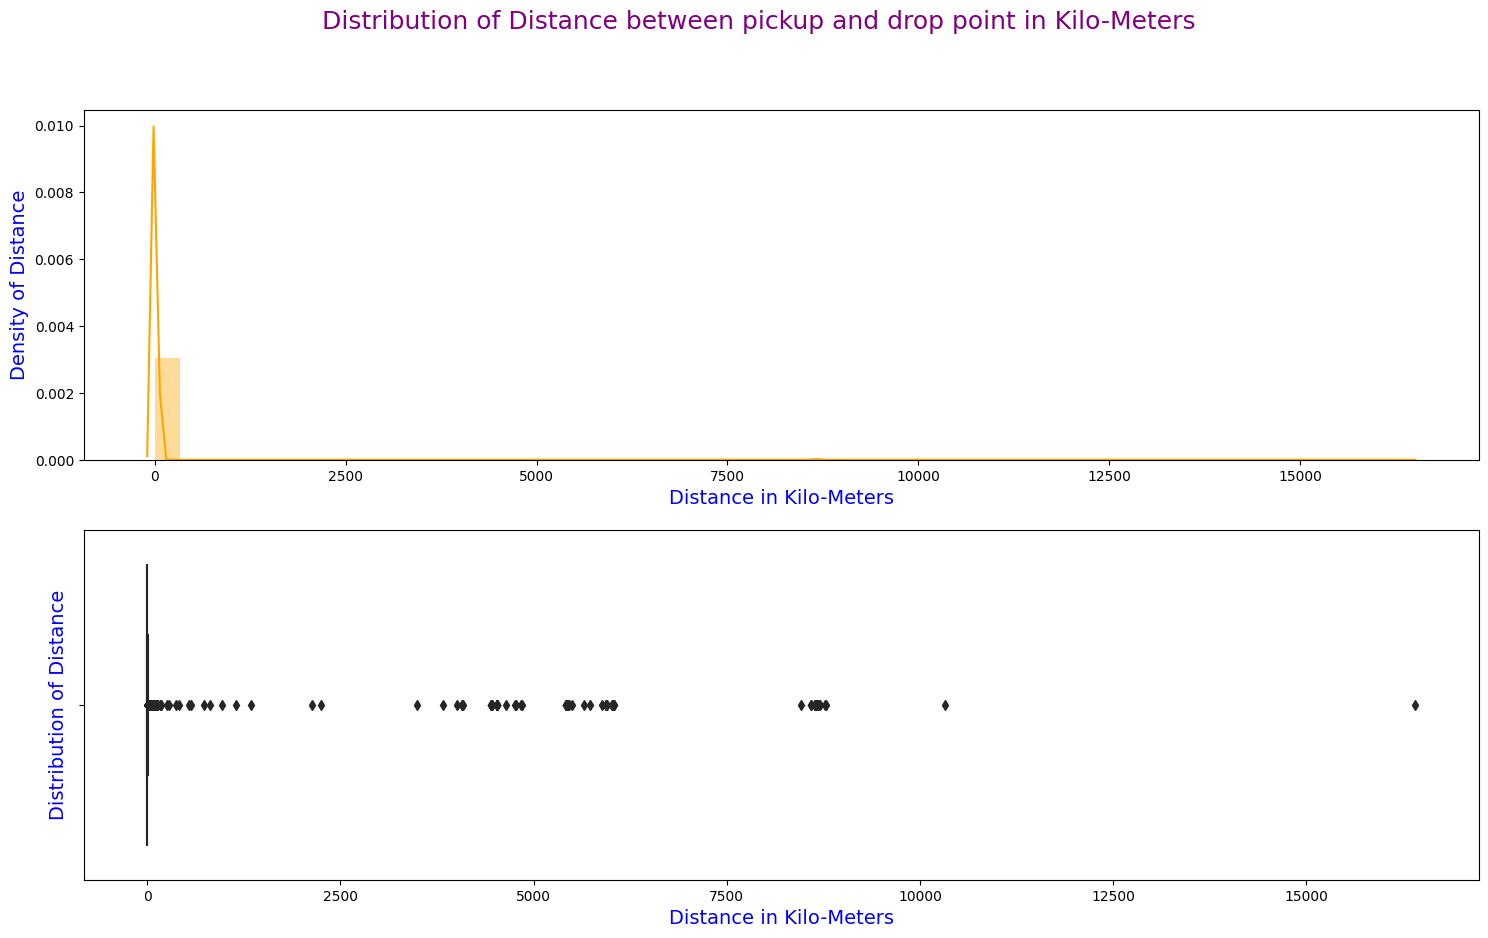

In [24]:
plt.figure(figsize=(18,10))
plt.subplot(211)
sns.distplot(df.distance, color='orange')
plt.xlabel("Distance in Kilo-Meters", fontsize=14, color='blue')
plt.ylabel("Density of Distance", fontsize=14, color='blue');

plt.subplot(212)
sns.boxplot(data=df, x='distance', color='green')
plt.xlabel("Distance in Kilo-Meters", fontsize=14, color='blue')
plt.ylabel("Distribution of Distance", fontsize=14, color='blue');
plt.suptitle("Distribution of Distance between pickup and drop point in Kilo-Meters", fontsize=18, color='purple');

### Insights:
1. **Minimum Distance between pickup and drop point is 0 KM.**
2. **Maximum distance between pickup and drop point is 16409.24 KM.**
3. **Average distance between pickup and drop point is 20.86KM.**
4. **Median distance between pickup and drop point is 2.12KM.**
5. **From Distribution plot and boxplot we clearly see that there are many outliers and the data is right skewed.**

### 3. Number of rides with distance is zero?

In [23]:
print("Number of rides when the Harvesine Distance is Zero =", len(df[df['distance']==0]))

Number of rides when the Harvesine Distance is Zero = 5632


### 4. What is the mean 'fare_amount' for rides with 0 haversine distance?

In [26]:
zero_distance_df=df[df['distance']==0]

average_fare=zero_distance_df['fare_amount'].mean()
print("Average Fare amount when distance is zero =", average_fare.round(2))

Average Fare amount when distance is zero = 11.59


#### This seems interesting because when CAB has not covered in distance then why they took ride or trip amount.

In [27]:
zero_distance_df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,12,5,2,0.0
7,44195482,2.5,2012-12-11 13:52:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2012,12,11,1,13,0.0
11,6379048,8.5,2011-05-23 22:15:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2011,5,23,0,22,0.0
48,22405517,56.8,2013-01-03 22:24:41+00:00,-73.993498,40.764686,-73.993498,40.764686,1,2013,1,3,3,22,0.0
65,21993993,6.0,2014-05-05 19:27:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2014,5,5,0,19,0.0


### Insight for why The fare anmount is took when the ride distance is zero
1. **Observing data set for only distance=0, I found that the lattitude and longitude for pickup and dropoff is missing that means these values are zeors.**
2. **Zeros for pickup and drop latitude and langitude is might be an error while entering the data or there might chances that they booked the cab for ride but they didnt travel, and hence the waiting charges are took from the cab booking customer.**

### 5. What is the haversine distance between pickup and dropoff location for the costliest ride?

In [28]:
df[df['fare_amount']==df['fare_amount'].max()]['distance'].values.round(5)

array([0.00079])

### Insight:
**For distance 0.00079 KM cost for ride is 499 USD, and this the costliest ride.**

### 6. How many rides were recorded in the year 2014?

In [29]:
ride_by_year=df['year'].value_counts()
ride_by_year

2012    32396
2011    31945
2013    31194
2009    30536
2010    30194
2014    29968
2015    13766
Name: year, dtype: int64

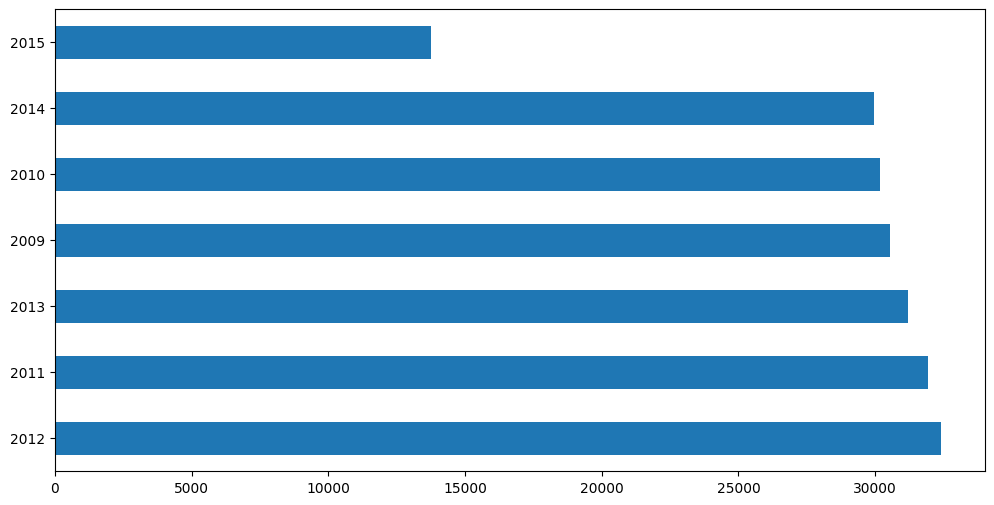

In [30]:
df['year'].value_counts().plot(kind='barh', figsize=(12,6));

### Insights:
1. **Maximum rides in the year 2012.**
2. **Minimum  rides in year 2015 and this is because we dont have all months data for 2015.**
3. **In 2014 there are 29968 rides or trips.**

### 7. How many rides were recorded in the first quarter of 2014?

In [24]:
def quarter(month):
    if month>=1 and month<=3:
        return "first quarter"
    elif month>=4 and month<=6:
        return "second quarter"
    elif month>=7 and month<=9:
        return "third quarter"
    else:
        return "forth quarter"


df['quarter']=df['month'].apply(quarter)
df['quarter']

0         second quarter
1          third quarter
2          third quarter
3         second quarter
4          third quarter
               ...      
199995     forth quarter
199996     first quarter
199997    second quarter
199998    second quarter
199999    second quarter
Name: quarter, Length: 199999, dtype: object

In [25]:
ride_2014_df=df[df['year']==2014]
ride_2014_df['quarter'].value_counts()

quarter
second quarter    7862
first quarter     7687
forth quarter     7452
third quarter     6967
Name: count, dtype: int64

### Insights:
1. **There are 7862 rides or trips in second quarter of 2014 which is maximum in any quarter of 20014.**
2. **7687 Rides in first quarter of 2014 and 7452 in forth quarter.**
3. **Minimum rides in the third quarter with just 6967 rides.**

### 8. On which day of the week in September 2010, maximum rides were recorded ?

In [27]:
rides_in_2010=df[df['year']==2010]

ride_in_sep_2010=df[df['month']==9]

ride_in_sep_2010['weekday'].value_counts()

def weekdayname(weekday):
    if weekday==0:
        return "monday"
    elif weekday==1:
        return "tuesday"
    elif weekday==2:
        return "wednesday"
    elif weekday==3:
        return "thursday"
    elif weekday==4:
        return "friday"
    elif weekday==5:
        return "saturday"
    else:
        return "sunday"
    
ride_in_sep_2010['weekday_name']=ride_in_sep_2010['weekday'].apply(weekdayname)
ride_in_sep_2010['weekday_name'].value_counts()

weekday_name
thursday     2351
saturday     2336
friday       2276
wednesday    2202
tuesday      2180
sunday       2087
monday       1834
Name: count, dtype: int64

<Axes: ylabel='weekday_name'>

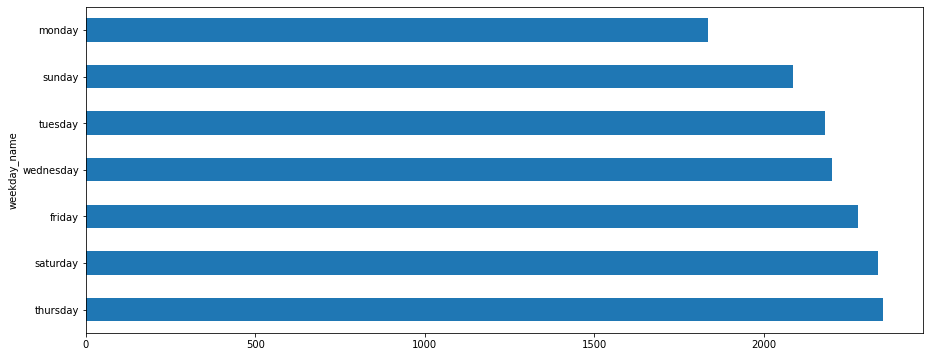

In [28]:
ride_in_sep_2010['weekday_name'].value_counts().plot(kind='barh', figsize=(15,6))

### Insights:
1. **Maximum rides where recorded on "Thursday".**
2. **Maximum rides where recorded on monday.**

### 9. On which time of day maximum CABS booked?
Divide 24 hrs by 0-6, 6-9, 9-12, 12-15, 15-18, 18-21, 21-0

In [30]:
def timeofday(hours):
    if hours>=0 and hours<=3:
        return "12 AM to 3 AM"
    elif hours>=3 and hours<=6:
        return "3 AM to 6 AM"
    elif hours>=6 and hours <=9:
        return "6 AM to 9 AM"
    elif hours>=9 and hours <=12:
        return "9 AM to 12 PM"
    elif hours>=12 and hours <=15:
        return "12 PM to 3 PM"
    elif hours>=15 and hours <=18:
        return "3 PM to 6 PM"
    elif hours>=18 and hours <=21:
        return "6 PM to 9 PM"
    else:
        return "9 PM to 12 AM"
    
df['timeofday']=df['hour'].apply(timeofday)

df['timeofday'].value_counts()

timeofday
6 PM to 9 PM     35806
3 PM to 6 PM     30143
12 PM to 3 PM    29387
9 AM to 12 PM    28290
6 AM to 9 AM     25645
12 AM to 3 AM    21429
9 PM to 12 AM    20828
3 AM to 6 AM      8471
Name: count, dtype: int64

### Insights:
1. **Maximum cabs booked between 6PM and 9PM.**
2. **Least cabs booked between 3AM and 6AM.**

### 10. Analyze passengers count in each ride

In [31]:
df['passenger_count'].describe()

count    199999.000000
mean          1.684543
std           1.385995
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [34]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: count, dtype: int64

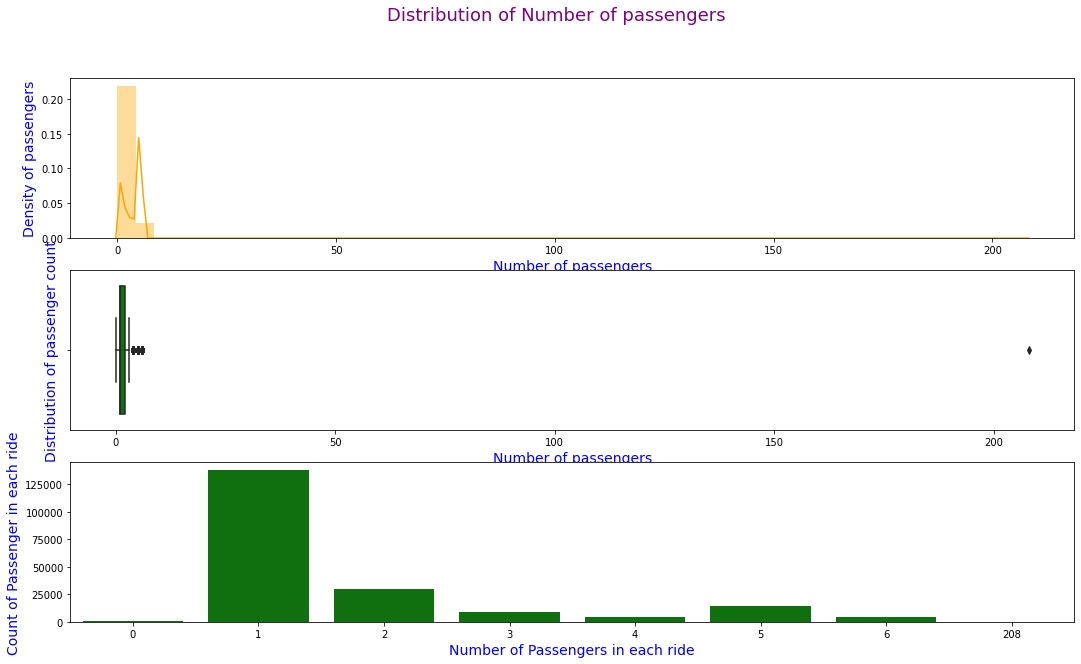

In [33]:
plt.figure(figsize=(18,10))
plt.subplot(311)
sns.distplot(df.passenger_count, color='orange')
plt.xlabel("Number of passengers", fontsize=14, color='blue')
plt.ylabel("Density of passengers", fontsize=14, color='blue');

plt.subplot(312)
sns.boxplot(data=df, x='passenger_count', color='green')
plt.xlabel("Number of passengers", fontsize=14, color='blue')
plt.ylabel("Distribution of passenger count", fontsize=14, color='blue');

plt.subplot(313)
sns.countplot(data=df, x='passenger_count', color='green')
plt.xlabel("Number of Passengers in each ride", fontsize=14, color='blue')
plt.ylabel("Count of Passenger in each ride", fontsize=14, color='blue');
plt.suptitle("Distribution of Number of passengers", fontsize=18, color='purple');

### Insights:
1. **Maximum cabs ride had only one passenger.**
2. **There are some rides with zero passengers also this may be because the cab was booked but no one travelled in it.**
3. **We can observe one odd thing is the passenger count=208 and this is not possible, this is just a wrong entry.**

## 11. Apply a Machine Learning Algorithm to predict the fare amount given following input features: passenger_count, distance and ride_week_day.

In [34]:
data=df[['passenger_count','distance','weekday','fare_amount']]
data.head()

,passenger_count,distance,weekday,fare_amount
0,1,1.683323,3,7.5
1,1,2.457590,4,7.7
2,1,5.036377,0,12.9
3,3,1.661683,4,5.3
4,5,4.475450,3,16.0


### Quick EDA on features

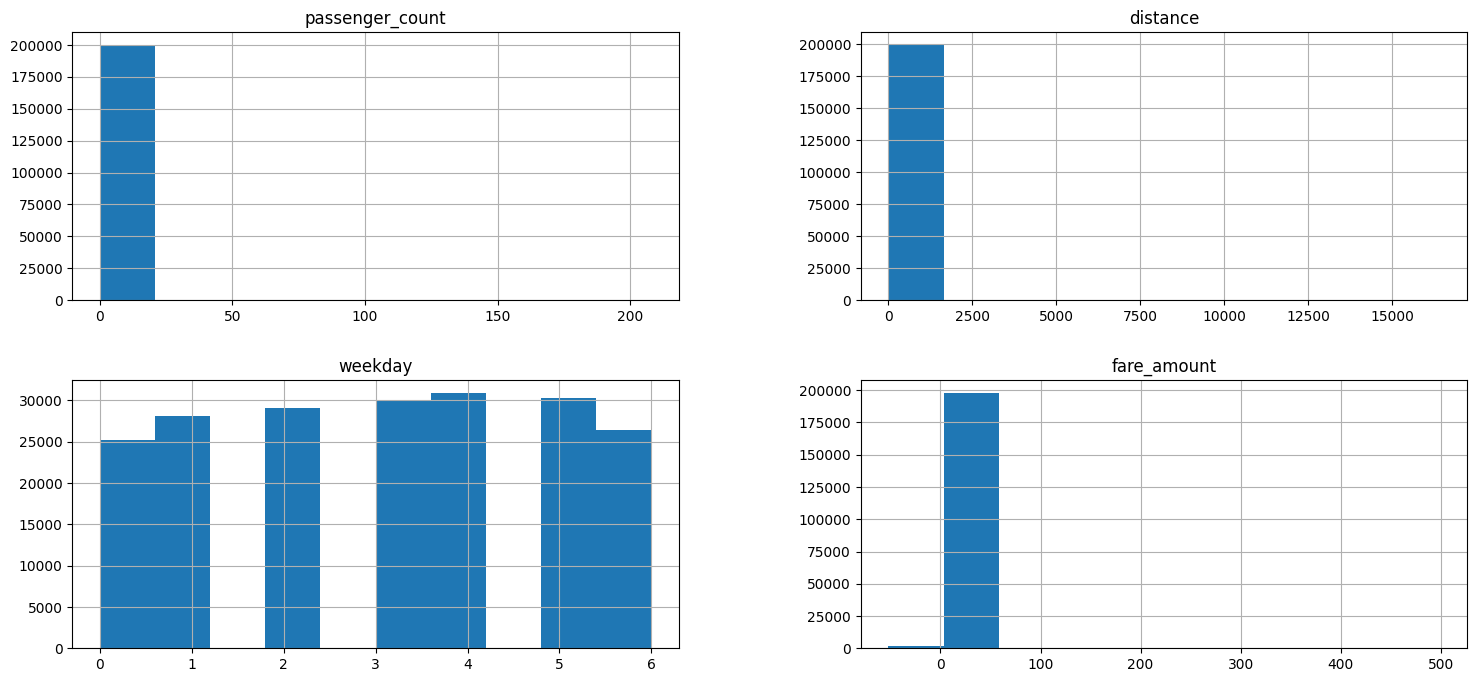

In [35]:
data.hist(figsize=(18,8));

### Clearly we see outliers in all columns except weekday because this is categorical descrete.

### For simplicity I am just going log tranformation to bring outliers into lower values and plot the histogram.

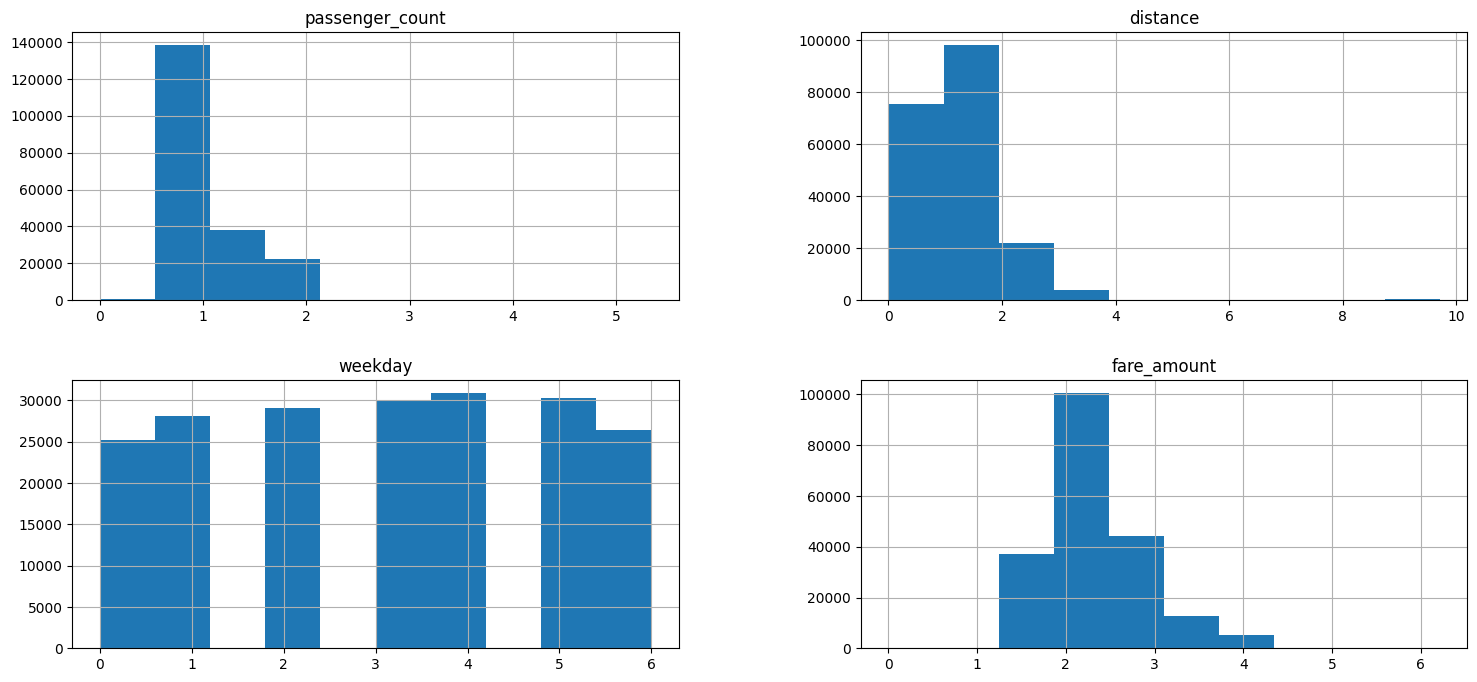

In [36]:
data['fare_amount']=np.log(data['fare_amount']+1)
data['passenger_count']=np.log(data['passenger_count']+1)
data['distance']=np.log(data['distance']+1)

data.hist(figsize=(18,8));

### Now the columns looking like normally distributed

In [37]:
data.dropna(inplace=True)

### Split data into input and output/target

In [38]:
X=data.drop('fare_amount', axis=1)
y=data['fare_amount']

###  Train test split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)
print("X train shape", x_train.shape)
print("Y train shape", y_train.shape)
print("X test shape", x_test.shape)
print("Y test shape", y_test.shape)

X train shape (139987, 3)
Y train shape (139987,)
X test shape (59995, 3)
Y test shape (59995,)


### Itarate through FOR LOOP which train each and every model, make prediction and also evaluate the model

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### Create model dictionary

In [41]:
models={
    "Linear Regresssion":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    #"Support Vector Machine":SVR(), # Taking huge time
    "Random Forest":RandomForestRegressor(),
    #"Extra Tree":ExtraTreesRegressor(), #Taking huge time
    #"AdaBoost":AdaBoostRegressor(),
    #"Gradient Boost":GradientBoostingRegressor(),
    "XGBoost":XGBRegressor()}

### Fit, Predict and Evaluate the models

In [42]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_percentage_error as mape

In [43]:
for name, model in models.items():
    print("Algorithm Name:", name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("RMSE=", np.sqrt(mse(y_test,y_pred)).round(4))
    print("R2 Score=", r2(y_test,y_pred).round(4))
    print("Percentage Error=", (mape(y_test,y_pred))*100)
    print("-----"*10)

Algorithm Name: Linear Regresssion
RMSE= 0.3879
R2 Score= 0.4955
Percentage Error= 48954684007813.42
--------------------------------------------------
Algorithm Name: Lasso
RMSE= 0.5461
R2 Score= -0.0
Percentage Error= 17523747244782.611
--------------------------------------------------
Algorithm Name: Ridge
RMSE= 0.3879
R2 Score= 0.4955
Percentage Error= 48954256886380.73
--------------------------------------------------
Algorithm Name: KNN
RMSE= 0.2944
R2 Score= 0.7094
Percentage Error= 21789885953747.316
--------------------------------------------------
Algorithm Name: Decision Tree
RMSE= 0.3748
R2 Score= 0.5289
Percentage Error= 16064674016963.006
--------------------------------------------------
Algorithm Name: Random Forest
RMSE= 0.3002
R2 Score= 0.6978
Percentage Error= 15594682942797.36
--------------------------------------------------
Algorithm Name: XGBoost
RMSE= 0.2718
R2 Score= 0.7522
Percentage Error= 16426243632377.463
-----------------------------------------------

### Run above to Create a dataframe for results

In [44]:
result=pd.DataFrame()
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=np.sqrt(mse(y_test,y_pred)).round(4)
    r2_score=r2(y_test,y_pred).round(4)
    perc_error=(mape(y_test,y_pred))*100
    results=pd.DataFrame({"Algorithm Name":[name], "RMSE":[rmse], "R2 Score":[r2_score], "Percentage Error":[perc_error]})
    result=pd.concat((result,results))
result

,Algorithm Name,RMSE,R2 Score,Percentage Error
0,Linear Regresssion,0.3879,0.4955,4.895468e+13
0,Lasso,0.5461,-0.0000,1.752375e+13
0,Ridge,0.3879,0.4955,4.895426e+13
0,KNN,0.2944,0.7094,2.178989e+13
0,Decision Tree,0.3749,0.5287,1.606467e+13
0,Random Forest,0.2999,0.6985,1.617361e+13
0,XGBoost,0.2718,0.7522,1.642624e+13


### Plot the Barplot for each evaluation matrics

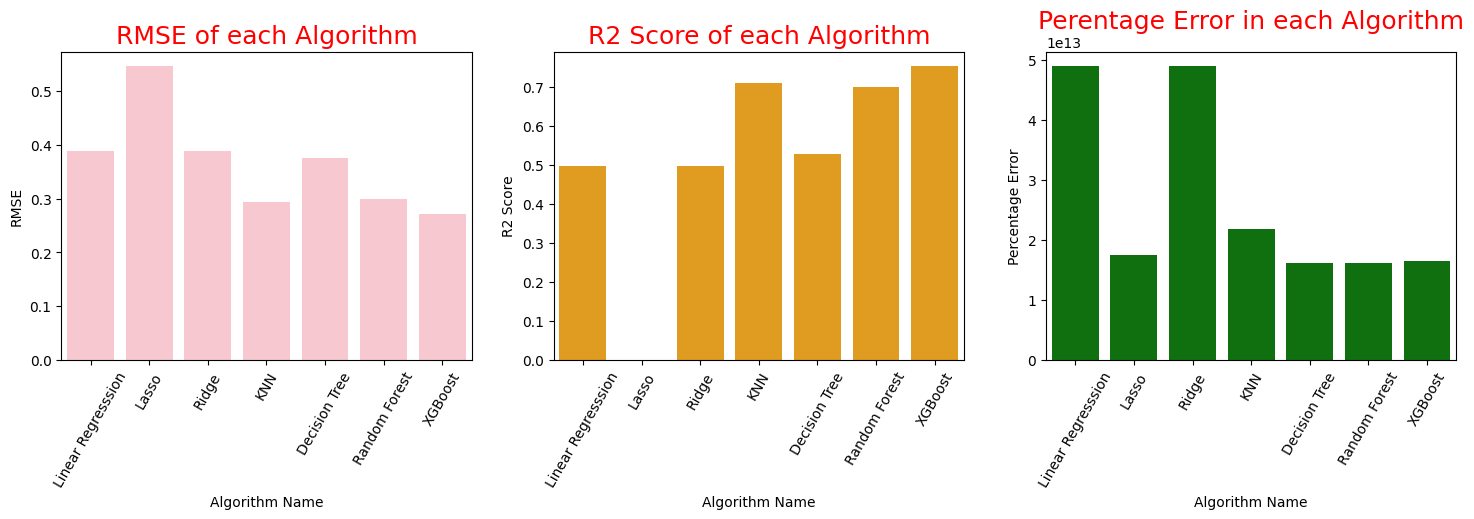

In [45]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='Algorithm Name', y='RMSE', data=result, color='pink')
plt.xticks(rotation=60)
plt.title("RMSE of each Algorithm", fontsize=18, color='red')

plt.subplot(132)
sns.barplot(x='Algorithm Name', y='R2 Score', data=result, color='orange')
plt.xticks(rotation=60)
plt.title("R2 Score of each Algorithm", fontsize=18, color='red')

plt.subplot(133)
sns.barplot(x='Algorithm Name', y='Percentage Error',  data=result, color='green')
plt.xticks(rotation=60)
plt.title("Perentage Error in each Algorithm", fontsize=18, color='red');

### Insight for best model:
- **For XGBoost Regression algorithm RMSE is very low, R2 Score is very high and Percentage Error is also low, Hence select XGBoost for future query prediction.**